### DAB 401 Financial Analytics
### Final Project
### Group-5
#### Group Members
- Dinesh Yadav Vudi - 0749162
- RaghuRam Alluri - 0749257
- Manikanta Teku  - 0749676
- Vamsi Nadendla  - 0750340
- Manoj kumar     -  0746816

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In C:\Users\dines\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dines\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dines\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dines\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dines\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df= pd.read_csv('FX_RATES_DAILY-sd-2017-01-03.csv', index_col = 0)

In [3]:
df.head()

FXINRCAD
date              
1/3/2017   0.01965
1/4/2017   0.01959
1/5/2017   0.01954
1/6/2017   0.01942
1/9/2017   0.01942

In [4]:
df.tail()

FXINRCAD
date               
3/24/2021   0.01730
3/25/2021   0.01735
3/26/2021   0.01732
3/29/2021   0.01731
3/30/2021   0.01720

In [5]:
df = df.rename(columns={'FXINRCAD':'Demand'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 1/3/2017 to 3/30/2021
Data columns (total 1 columns):
Demand    1061 non-null float64
dtypes: float64(1)
memory usage: 16.6+ KB


In [7]:
train =df[:850]
test = df[850:]

In [8]:
print(train.shape)
print(test.shape)

(850, 1)
(211, 1)


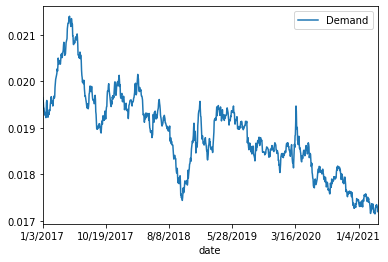

In [9]:
df.plot()
plt.show()

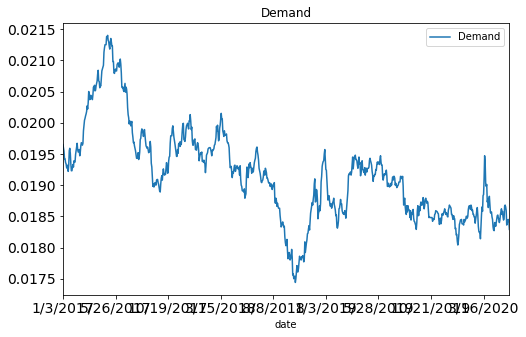

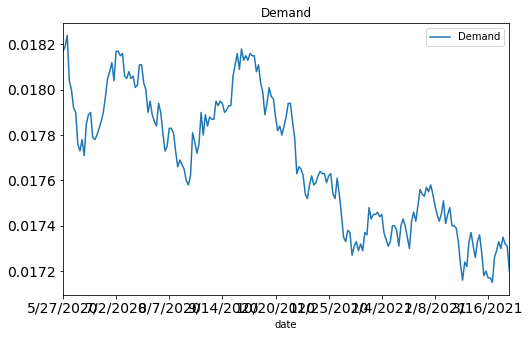

In [10]:
#Plotting train and test data
train.plot(figsize=(8,5), title= 'Demand', fontsize=14)
test.plot(figsize=(8,5), title= 'Demand', fontsize=14)
plt.show()

##### Moving Average

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [12]:
df['SMA_12'] = df.Demand.rolling(12, min_periods=1).mean()

In [13]:
df['Error_12']=df.Demand-df.SMA_12

In [14]:
df.head()

Demand    SMA_12  Error_12
date                                 
1/3/2017  0.01965  0.019650  0.000000
1/4/2017  0.01959  0.019620 -0.000030
1/5/2017  0.01954  0.019593 -0.000053
1/6/2017  0.01942  0.019550 -0.000130
1/9/2017  0.01942  0.019524 -0.000104

Text(0, 0.5, 'Demand')

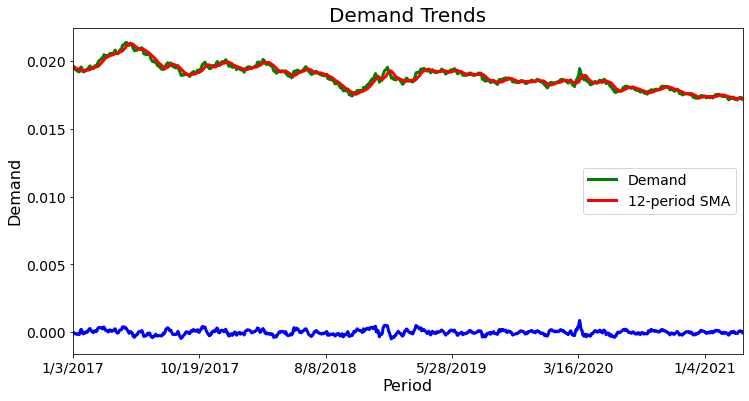

In [15]:
# colors for the line plot
colors = ['green', 'red', 'blue']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand', '12-period SMA'], fontsize=14)

# title and labels
plt.title('Demand Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

In [16]:
MAE = df.Error_12.abs().mean()  
print("MAE:",round(MAE)) 
RMSE_sma = np.sqrt((df.Error_12**2).mean())
print("RMSE:",round(RMSE_sma))
MSE= (df.Error_12**2).mean()
print("MSE:",round(MSE))

MAE: 0
RMSE: 0.0
MSE: 0


##### Exponential Smoothing
##### Simple Exponential Smoothing

MAE 0.00
MSE 0.00
RMSE 0.00


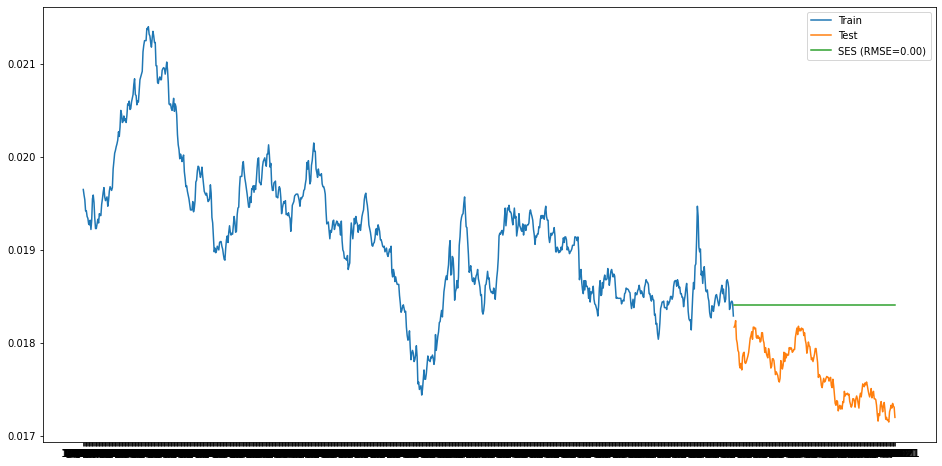

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.3,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.SES)
mse=mean_squared_error(test.Demand, pred.SES)
rmse_ses = sqrt(mean_squared_error(test.Demand, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_ses))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse_ses)) 
plt.legend()
plt.show()

In [18]:
pred

Demand       SES
date                        
5/27/2020  0.01817  0.018406
5/28/2020  0.01819  0.018406
5/29/2020  0.01824  0.018406
6/1/2020   0.01804  0.018406
6/2/2020   0.01800  0.018406
...            ...       ...
3/24/2021  0.01730  0.018406
3/25/2021  0.01735  0.018406
3/26/2021  0.01732  0.018406
3/29/2021  0.01731  0.018406
3/30/2021  0.01720  0.018406

[211 rows x 2 columns]

##### Double Exponential Smoothing

MAE 0.00
MSE 0.00
RMSE 0.00


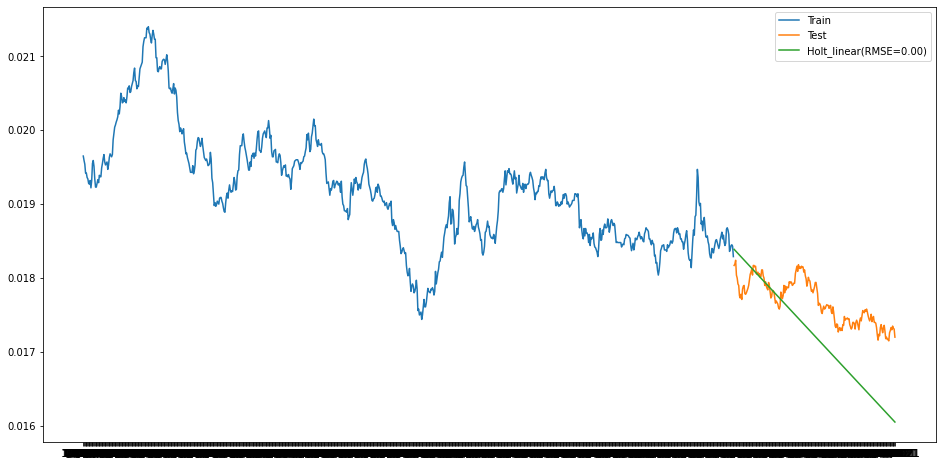

In [19]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.Demand, pred.Holt_linear)
mse=mean_squared_error(test.Demand, pred.Holt_linear)
rmse_des = sqrt(mean_squared_error(test.Demand, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_des))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse_des))
plt.legend()
plt.show()

In [20]:
pred

Demand  Holt_linear
date                           
5/27/2020  0.01817     0.018388
5/28/2020  0.01819     0.018377
5/29/2020  0.01824     0.018366
6/1/2020   0.01804     0.018355
6/2/2020   0.01800     0.018344
...            ...          ...
3/24/2021  0.01730     0.016097
3/25/2021  0.01735     0.016086
3/26/2021  0.01732     0.016074
3/29/2021  0.01731     0.016063
3/30/2021  0.01720     0.016052

[211 rows x 2 columns]

##### Triple Exponential Smoothing

MAE 0.00
MSE 0.00
RMSE 0.00


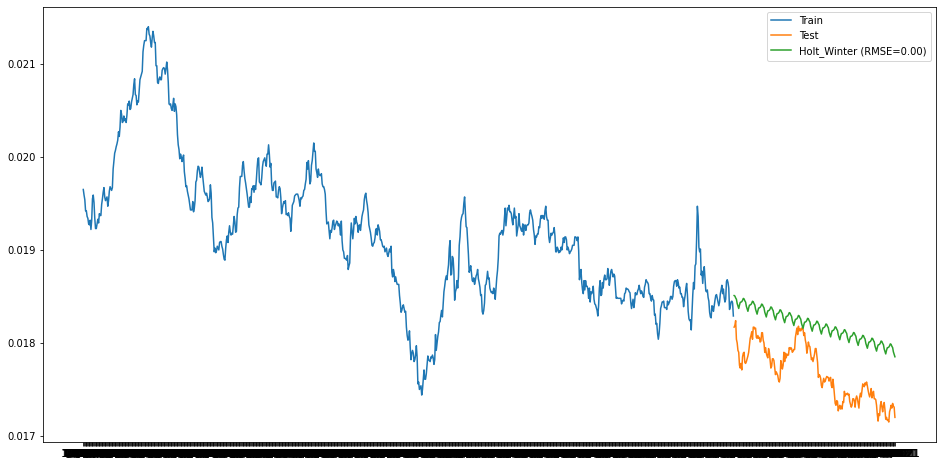

In [21]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Demand']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit(smoothing_level = 0.1,smoothing_slope = 0.1)

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.Holt_Winter)
mse=mean_squared_error(test.Demand, pred.Holt_Winter)
rmse_tes = sqrt(mean_squared_error(test.Demand, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse_tes))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse_tes))

plt.legend()
plt.show()

In [22]:
pred

Demand  Holt_Winter
date                           
5/27/2020  0.01817     0.018510
5/28/2020  0.01819     0.018504
5/29/2020  0.01824     0.018484
6/1/2020   0.01804     0.018470
6/2/2020   0.01800     0.018424
...            ...          ...
3/24/2021  0.01730     0.017964
3/25/2021  0.01735     0.017951
3/26/2021  0.01732     0.017904
3/29/2021  0.01731     0.017878
3/30/2021  0.01720     0.017852

[211 rows x 2 columns]

In [23]:
df

Demand    SMA_12  Error_12
date                                  
1/3/2017   0.01965  0.019650  0.000000
1/4/2017   0.01959  0.019620 -0.000030
1/5/2017   0.01954  0.019593 -0.000053
1/6/2017   0.01942  0.019550 -0.000130
1/9/2017   0.01942  0.019524 -0.000104
...            ...       ...       ...
3/24/2021  0.01730  0.017252  0.000048
3/25/2021  0.01735  0.017253  0.000097
3/26/2021  0.01732  0.017250  0.000070
3/29/2021  0.01731  0.017253  0.000057
3/30/2021  0.01720  0.017254 -0.000054

[1061 rows x 3 columns]

In [24]:
df=df.drop(['SMA_12','Error_12'],1)

In [25]:
df

Demand
date              
1/3/2017   0.01965
1/4/2017   0.01959
1/5/2017   0.01954
1/6/2017   0.01942
1/9/2017   0.01942
...            ...
3/24/2021  0.01730
3/25/2021  0.01735
3/26/2021  0.01732
3/29/2021  0.01731
3/30/2021  0.01720

[1061 rows x 1 columns]

In [26]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
df = df.reset_index()

In [27]:
df[['ds','y']]= df[['date','Demand']]
df

date   Demand         ds        y
0      1/3/2017  0.01965   1/3/2017  0.01965
1      1/4/2017  0.01959   1/4/2017  0.01959
2      1/5/2017  0.01954   1/5/2017  0.01954
3      1/6/2017  0.01942   1/6/2017  0.01942
4      1/9/2017  0.01942   1/9/2017  0.01942
...         ...      ...        ...      ...
1056  3/24/2021  0.01730  3/24/2021  0.01730
1057  3/25/2021  0.01735  3/25/2021  0.01735
1058  3/26/2021  0.01732  3/26/2021  0.01732
1059  3/29/2021  0.01731  3/29/2021  0.01731
1060  3/30/2021  0.01720  3/30/2021  0.01720

[1061 rows x 4 columns]

In [28]:
from fbprophet import Prophet
plt.style.use('fivethirtyeight')
model=Prophet()

In [29]:
df

date   Demand         ds        y
0      1/3/2017  0.01965   1/3/2017  0.01965
1      1/4/2017  0.01959   1/4/2017  0.01959
2      1/5/2017  0.01954   1/5/2017  0.01954
3      1/6/2017  0.01942   1/6/2017  0.01942
4      1/9/2017  0.01942   1/9/2017  0.01942
...         ...      ...        ...      ...
1056  3/24/2021  0.01730  3/24/2021  0.01730
1057  3/25/2021  0.01735  3/25/2021  0.01735
1058  3/26/2021  0.01732  3/26/2021  0.01732
1059  3/29/2021  0.01731  3/29/2021  0.01731
1060  3/30/2021  0.01720  3/30/2021  0.01720

[1061 rows x 4 columns]

In [30]:
prophet_df = df.drop(['date','Demand'],axis=1)
prophet_df

ds        y
0      1/3/2017  0.01965
1      1/4/2017  0.01959
2      1/5/2017  0.01954
3      1/6/2017  0.01942
4      1/9/2017  0.01942
...         ...      ...
1056  3/24/2021  0.01730
1057  3/25/2021  0.01735
1058  3/26/2021  0.01732
1059  3/29/2021  0.01731
1060  3/30/2021  0.01720

[1061 rows x 2 columns]

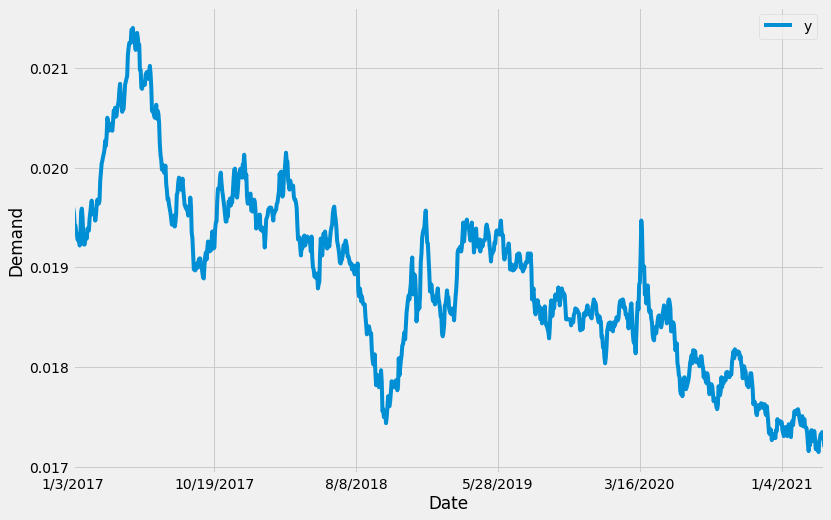

In [31]:
ax = prophet_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Demand')
ax.set_xlabel('Date')

plt.show()

##### Eliminating the moving average and error columns from the dataframe

In [32]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future=model.make_future_dataframe(periods=165)
future.tail()

ds
1221 2021-09-07
1222 2021-09-08
1223 2021-09-09
1224 2021-09-10
1225 2021-09-11

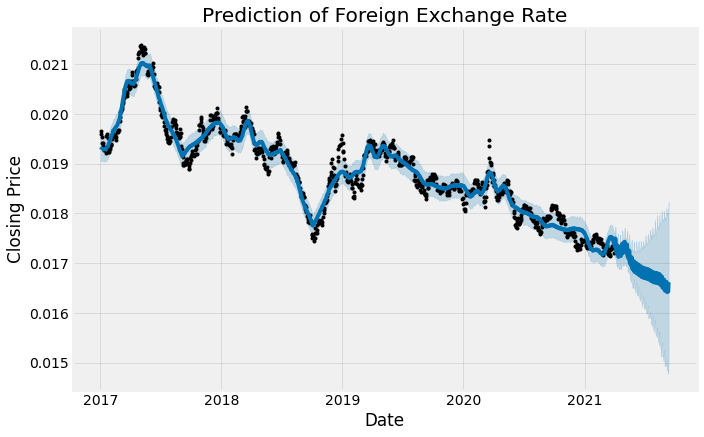

ds      yhat  yhat_lower  yhat_upper
1221 2021-09-07  0.016416    0.014878    0.018007
1222 2021-09-08  0.016426    0.014797    0.017990
1223 2021-09-09  0.016430    0.014773    0.017992
1224 2021-09-10  0.016430    0.014797    0.018021
1225 2021-09-11  0.016616    0.014983    0.018237

In [34]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Foreign Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

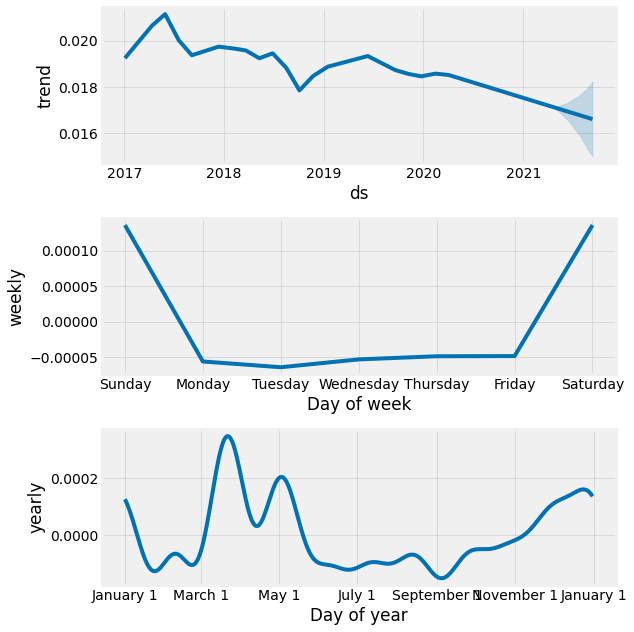

In [35]:
model.plot_components(predictions)
plt.show()

In [36]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1221 2021-09-07  0.016416    0.014931    0.018045
1222 2021-09-08  0.016426    0.014831    0.018057
1223 2021-09-09  0.016430    0.014896    0.018114
1224 2021-09-10  0.016430    0.014901    0.018115
1225 2021-09-11  0.016616    0.015015    0.018284

In [37]:
rmse_fb = np.sqrt(np.mean(np.square(predictions.yhat-prophet_df.y)))
print(rmse_fb)

0.000189142856834964


In [38]:
# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Demand'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]  

(1061, 1)


array([[0.01965],
       [0.01959],
       [0.01954],
       [0.01942],
       [0.01942]])

In [39]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [40]:
dataset_train.shape

(848, 1)

In [41]:
dataset_test.shape

(263, 1)

In [42]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.
from sklearn.preprocessing import MinMaxScaler
import os
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.55808081],
       [0.54292929],
       [0.53030303],
       [0.5       ],
       [0.5       ]])

In [43]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.28787879],
       [0.3510101 ],
       [0.35606061],
       [0.42171717],
       [0.51262626]])

In [44]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [45]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.55808081, 0.54292929, 0.53030303, 0.5       , 0.5       ,
        0.48484848, 0.47979798, 0.46464646, 0.46212121, 0.47474747,
        0.44949495, 0.47474747, 0.53282828, 0.54292929, 0.52272727,
        0.47979798, 0.4520202 , 0.4520202 , 0.46464646, 0.47727273,
        0.46717172, 0.49242424, 0.48737374, 0.48737374, 0.51767677,
        0.53282828, 0.55050505, 0.56313131, 0.53787879, 0.52777778,
        0.53282828, 0.53787879, 0.51262626, 0.52777778, 0.5530303 ,
        0.56565657, 0.56060606, 0.55555556, 0.56313131, 0.61363636,
        0.63383838, 0.65656566, 0.66414141, 0.67424242, 0.68181818,
        0.69191919, 0.71464646, 0.7020202 , 0.72727273, 0.77272727]])

In [46]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.28787879, 0.3510101 , 0.35606061, 0.42171717, 0.51262626,
        0.48484848, 0.40151515, 0.38888889, 0.39646465, 0.32575758,
        0.33585859, 0.3030303 , 0.33585859, 0.34848485, 0.31313131,
        0.28282828, 0.28030303, 0.28535354, 0.26515152, 0.25505051,
        0.22474747, 0.21212121, 0.20959596, 0.24242424, 0.23989899,
        0.22727273, 0.24242424, 0.25757576, 0.27020202, 0.27272727,
        0.26262626, 0.25252525, 0.24242424, 0.25252525, 0.27525253,
        0.28535354, 0.2979798 , 0.27525253, 0.28787879, 0.26515152,
        0.25252525, 0.26010101, 0.30808081, 0.31313131, 0.30555556,
        0.29040404, 0.23232323, 0.23989899, 0.25252525, 0.25505051]])

In [47]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
#Import all deep learing learning library to create LSTM model
import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

In [49]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))

In [50]:
model.add(Dense(units=1))

In [51]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
#Fit the model

model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
25/25 [==============================] - 18s 731ms/step - loss: 0.0362
Epoch 2/20
25/25 [==============================] - 18s 709ms/step - loss: 0.0077
Epoch 3/20
25/25 [==============================] - 18s 711ms/step - loss: 0.0089
Epoch 4/20
25/25 [==============================] - 18s 715ms/step - loss: 0.0070
Epoch 5/20
25/25 [==============================] - 18s 716ms/step - loss: 0.0061
Epoch 6/20
25/25 [==============================] - 18s 713ms/step - loss: 0.0052
Epoch 7/20
25/25 [==============================] - 18s 717ms/step - loss: 0.0053
Epoch 8/20
25/25 [==============================] - 18s 716ms/step - loss: 0.0048
Epoch 9/20
25/25 [==============================] - 18s 710ms/step - loss: 0.0047
Epoch 10/20
25/25 [==============================] - 18s 712ms/step - loss: 0.0053
Epoch 11/20
25/25 [==============================] - 18s 712ms/step - loss: 0.0049
Epoch 12/20
25/25 [==============================] - 18s 713ms/step - loss: 0.0053
Epoch 13/20
2

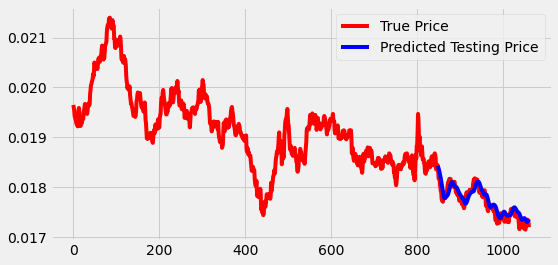

In [53]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [54]:
rmse_lstm = sqrt(mean_squared_error(y_test, predictions))
print(rmse_lstm)

0.08807202817382494


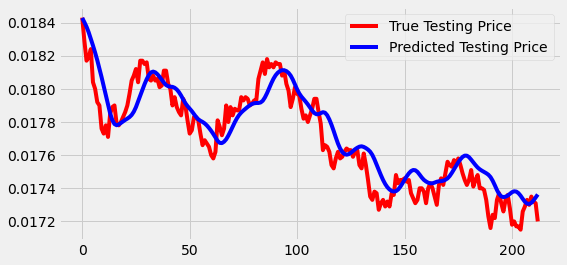

In [55]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [56]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds) 

[0.017362561, 0.017383732, 0.017409455, 0.01743904, 0.01747004]


In [58]:
### Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.
RMSE = {'ModelName':['Simple Moving Average','SES','DES','TES','FBProphet','LSTM'],
        'RMSE_Scores':[RMSE_sma,rmse_ses,rmse_des,rmse_tes,rmse_fb,rmse_lstm]}
RMSE = pd.DataFrame(RMSE, columns = ['ModelName','RMSE_Scores'])
RMSE.sort_values(by = 'RMSE_Scores') 

ModelName  RMSE_Scores
0  Simple Moving Average     0.000174
4              FBProphet     0.000189
3                    TES     0.000541
2                    DES     0.000656
1                    SES     0.000779
5                   LSTM     0.088072